# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# save configuration info for website
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# partial query 
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# create empty lists to hold responses
city_names = []
lat = []
lon = []
date = []
temp = []
humid = []
wind_speed = []
cloud = []
country = []
ID = []

# try and except 
for index, city in enumerate(cities):
    
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
        city_names.append(city)
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print("City Number " + str(index)+ ',' + city)
        
    except:
        print ("City Not Found")
        


City Number 0,san quintin
City Number 1,ushuaia
City Number 2,busselton
City Number 3,domoni
City Number 4,khatanga
City Number 5,gao
City Number 6,cape town
City Number 7,tuatapere
City Number 8,presidencia roque saenz pena
City Number 9,mataura
City Number 10,alice springs
City Number 11,tasiilaq
City Number 12,jamestown
City Number 13,murupara
City Number 14,puerto ayora
City Number 15,bredasdorp
City Number 16,chokurdakh
City Not Found
City Number 18,olafsvik
City Number 19,itarema
City Number 20,torbay
City Number 21,batticaloa
City Number 22,arrecife
City Number 23,hermanus
City Number 24,souillac
City Number 25,langarud
City Number 26,ribeira grande
City Number 27,bima
City Number 28,luzhou
City Number 29,lompoc
City Number 30,rikitea
City Not Found
City Number 32,yoichi
City Not Found
City Number 34,iqaluit
City Number 35,tecoanapa
City Number 36,belmonte
City Number 37,atuona
City Number 38,upernavik
City Number 39,cardonal
City Number 40,thompson
City Number 41,punta arenas
C

City Number 345,vondrozo
City Number 346,lazaro cardenas
City Number 347,chapais
City Number 348,nyagan
City Number 349,port blair
City Number 350,mount isa
City Number 351,luderitz
City Number 352,vieste
City Number 353,lufkin
City Number 354,buchach
City Number 355,saint-georges
City Number 356,isangel
City Number 357,portland
City Number 358,bacolod
City Number 359,kailua
City Number 360,guozhen
City Number 361,ayan
City Number 362,port keats
City Not Found
City Number 364,uruzgan
City Number 365,nanzhou
City Number 366,scottsbluff
City Number 367,wattegama
City Number 368,calvinia
City Number 369,paamiut
City Number 370,ostrovnoy
City Number 371,lagoa
City Number 372,turukhansk
City Number 373,paraiso
City Number 374,salisbury
City Number 375,henties bay
City Number 376,miyako
City Number 377,rodeo
City Number 378,butembo
City Number 379,narsaq
City Number 380,flin flon
City Number 381,hasaki
City Number 382,bundi
City Number 383,viransehir
City Number 384,chake chake
City Number 3

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
cities_df = pd.DataFrame({"City Name":city_names, "Country": country, "Longitude":lon, "Latitude":lat, "Temperature": temp,
                         "Humidity":humid, "Wind Speed": wind_speed, "Cloudiness": cloud, "Date": date})
cities_df

,City Name,Country,Longitude,Latitude,Temperature,Humidity,Wind Speed,Cloudiness,Date
0,san quintin,MX,-115.95,30.48,81.55,44,15.61,100,1603049066
1,ushuaia,AR,-68.30,-54.80,42.80,75,28.86,75,1603049066
2,busselton,AU,115.33,-33.65,59.00,54,8.84,0,1603049067
3,domoni,KM,44.53,-12.26,77.79,73,5.37,54,1603049067
4,khatanga,RU,102.50,71.97,6.89,86,8.72,71,1603049067
...,...,...,...,...,...,...,...,...,...
566,sawtell,AU,153.10,-30.38,60.80,93,9.17,90,1603049204
567,pangoa,PE,-73.00,-12.12,83.95,58,4.00,97,1603049204
568,coihaique,CL,-72.07,-45.58,44.60,75,3.36,90,1603049204
569,calamar,CO,-74.91,10.25,87.80,74,11.41,40,1603049205


In [10]:
cities_df.to_csv("../output_data/cities_data.csv", encoding = "utf-8", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
humidity_df = cities_df.loc[cities_df["Humidity"] > 100]
humidity_df

,City Name,Country,Longitude,Latitude,Temperature,Humidity,Wind Speed,Cloudiness,Date


In [24]:
#  Get the indices of cities that have humidity over 100%.

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

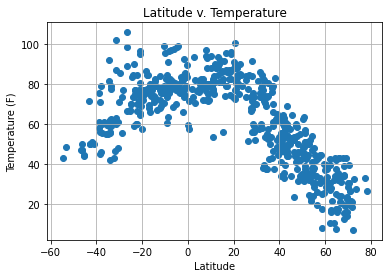

In [13]:
plt.scatter(cities_df['Latitude'], cities_df['Temperature'])
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Latitude v. Temperature")
plt.grid()

plt.show()

print("This plot is displaying the relationship between a city's temperature and it's position on the the Earth's axis. The trend shows that the cities closer to 0 degrees latitude have higher temperatures than those further away from 0 degrees latitude on either side.)")

## Latitude vs. Humidity Plot

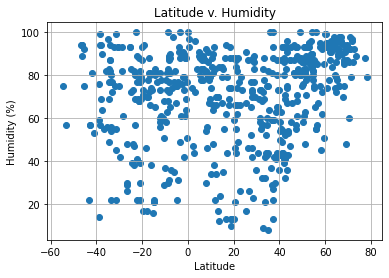

In [14]:
plt.scatter(cities_df['Latitude'], cities_df['Humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude v. Humidity")
plt.grid()

plt.show()

print("This plot displays the correlation between a city's position on the Earth's axis and the humidity of that city. According to this scatter plot, there is no real correlation between the latitude and the humidity of the city.")

## Latitude vs. Cloudiness Plot

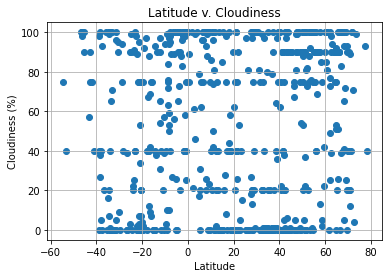

In [15]:
plt.scatter(cities_df['Latitude'], cities_df['Cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude v. Cloudiness")
plt.grid()

plt.show()

print("This plot displays the correlation between a city's position on the Earth's axis and the cloudiness of that city. According to this scatter plot, there is no real correlation between the latitude and the cloudiness of the city.")

## Latitude vs. Wind Speed Plot

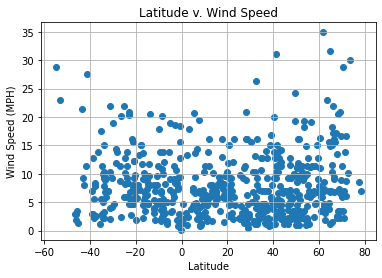

In [17]:
plt.scatter(cities_df['Latitude'], cities_df['Wind Speed'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title("Latitude v. Wind Speed")
plt.grid()


plt.show()

print("This plot displays the correlation between a city's position on the Earth's axis and the wind speed of that city. According to this scatter plot, there is no real correlation between the latitude and wind speed in a city.")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
nor_hem = cities_df.loc[cities_df["Latitude"] >= 0]

The r-value is: -0.8488682883148209


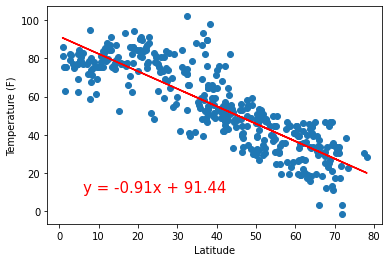

In [45]:
x_values = nor_hem['Latitude']
y_values = nor_hem['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

print(f"The r-value is: {rvalue}")

plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [34]:
south_hem = cities_df.loc[cities_df["Latitude"] <= 0]

The r-value is: 0.7242400548408562


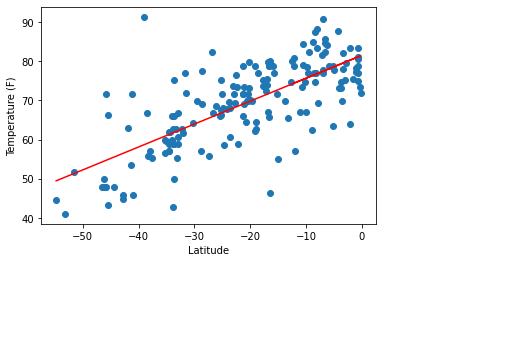

In [46]:
x_values = south_hem['Latitude']
y_values = south_hem['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

print(f"The r-value is: {rvalue}")

plt.show()

print("Both plots for the relation between latitude and max temperature of a given city prove to have a strong correlation. In the northern hempishere, there max temperature can almost be predicted by knowing the latitudinal coordinates of a city. In the southern hemisphere, there is a correlation, though not a strong as the northern hemisphere. This on a grand scheme could point to global warming, or maybe on all a smaller scale a seasonal difference.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.23796076244199887


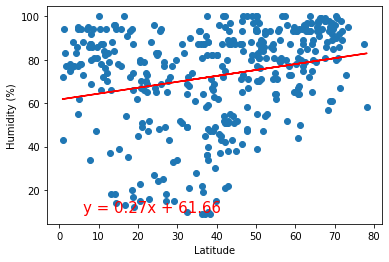

In [47]:
x_values = nor_hem['Latitude']
y_values = nor_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

print(f"The r-value is: {rvalue}")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1063121839735508


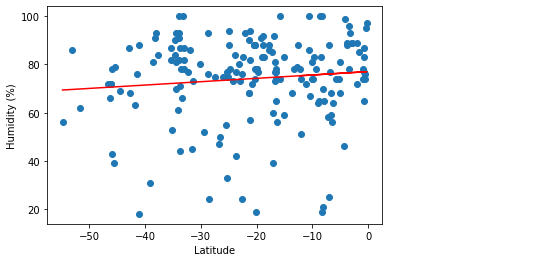

In [48]:
x_values = south_hem['Latitude']
y_values = south_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

print(f"The r-value is: {rvalue}")

plt.show()

print("The r values in the plots for latitude vs humidity comparison in the norther and southern hemisphere are extremely low, indicating almost no correlation between how humid a city is based on it's location.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2062840644029003


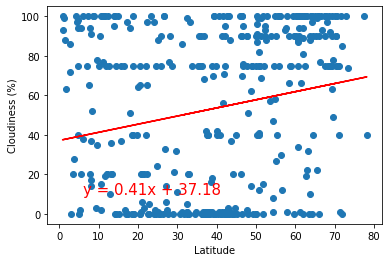

In [49]:
x_values = nor_hem['Latitude']
y_values = nor_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

print(f"The r-value is: {rvalue}")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.13363913454107584


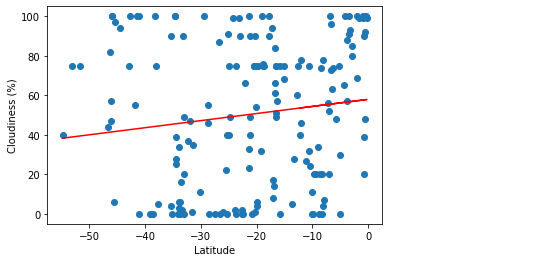

In [50]:
x_values = south_hem['Latitude']
y_values = south_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

print(f"The r-value is: {rvalue}")

plt.show()

print("The r values in the plots for latitude vs cloudiness comparison in the northern and southern hemisphere are extremely low, indicating almost no correlation between how cloudy a city is based on it's location.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.17498643564325278


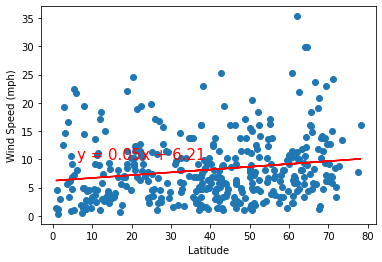

In [51]:
x_values = nor_hem['Latitude']
y_values = nor_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

print(f"The r-value is: {rvalue}")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.20087276683339383


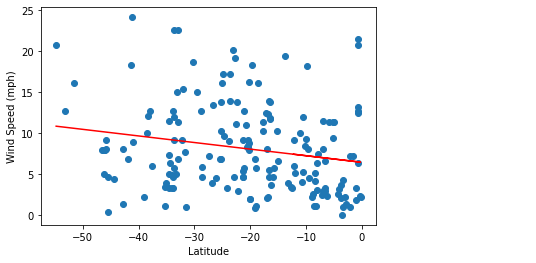

In [52]:
x_values = south_hem['Latitude']
y_values = south_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

print(f"The r-value is: {rvalue}")

plt.show()

print("The r values in the plots for latitude vs windspeed comparison in the norther and southern hemisphere are extremely low, indicating almost no correlation between how windy a city is based on it's location. However, it should be noted that the northern hemisphere has a positive correlation and the southern hemisphere has a negative correlation. Though this could likely be due to coincidence, it could indicate that in the northern hemisphere, wind speed is more like to increase as latitude increases, and vice versa, in the southern hemisphere, the wind speed is more likely to decrease as latitude decreases. More tests would need to be conducted to prove this theory")

## Observations
After analyzing the data from the plots included in this notebook I found that there are not many correlations between the position of a city on the Earth's axis and other weather characteristics. The strongest relation is to a city's location on the Earth's axis is the city's maximum temperature. The city's maximum temperature is almost directly correlated to the position of the city. Humidity, Cloudiness, and Wind Speed all seem to be very random when assessed based on latitudinal position. 